In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
N_CLUSTERS = 30

In [3]:
raw_data = np.loadtxt('EEG_feature.txt')
# print(raw_data.shape)
emotion_label = np.loadtxt('EEG_emotion_category.txt')
# print(emotion_label.shape)
subject_video_label = np.loadtxt('subject_video.txt')
# print(subject_video_label)

In [11]:
pca = PCA(n_components=2)
pcaout = pca.fit_transform(raw_data)
# print(out.shape)
# print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

0.7832508377532634


In [69]:
class cluster_eval(object):
    def _dist(self, x, y):
        return np.sum((x - y) ** 2) ** 0.5
    def __init__(self, raw_data):
        self.dis = [[self._dist(raw_data[i], raw_data[j]) for j in range(i)] for i in range(len(raw_data))]
    def eval(self, label, centers, clusters):
        self.clu_label = [[] for i in range(clusters)]
        for i in range(len(label)):
            self.clu_label[label[i]].append(i)
        # avg, diam
        self.clu_avg = [0 for i in range(clusters)]
        self.diam = [0 for i in range(clusters)]
        for i in range(clusters):
            clu_num = len(self.clu_label[i])
            for j in range(clu_num):
                for k in range(j):
                    jk_dis = self.dis[self.clu_label[i][j]][self.clu_label[i][k]]
                    self.clu_avg[i] += jk_dis
                    self.diam[i] = max(self.diam[i], jk_dis)
            self.clu_avg[i] *= 2 / (clu_num * (clu_num - 1))
        # dcen
        self.cen = [[self._dist(centers[i], centers[j]) for j in range(i)] for i in range(clusters)]
        # dmin
        self.dmin = [[j for j in i] for i in self.cen]
        for i in range(clusters):
            for j in range(i):
                for k in self.clu_label[i]:
                    for l in self.clu_label[j]:
                        self.dmin[i][j] = min(self.dmin[i][j], self.dis[max(k, l)][min(k, l)])
        # DBI
        self.DBI = sum(max(self.cen[max(i, j)][min(i, j)] for j in list(range(i)) + list(range(i + 1, clusters))) for i in range(clusters)) / clusters
        # print(self.DBI)
        # Dunn
        self.Dunn = min(min(i) for i in self.dmin[1:]) / max(self.diam)
        # print(self.Dunn)
        

In [70]:
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0)
kmeansout = kmeans.fit(raw_data)
e = cluster_eval(raw_data)
e.eval(kmeansout.labels_, kmeansout.cluster_centers_, N_CLUSTERS)

19.86407627122118
0.15158378787099322


In [29]:
colors = cm.rainbow(np.linspace(0, 1, N_CLUSTERS))
clu_colors = [colors[i] for i in kmeansout.labels_]

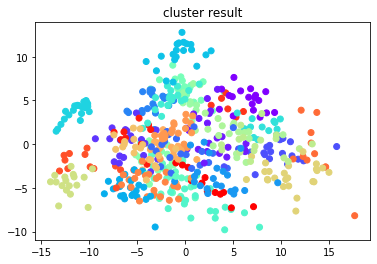

In [19]:
plt.title('cluster result')
plt.scatter(pcaout[..., 0], pcaout[..., 1], c=clu_colors)

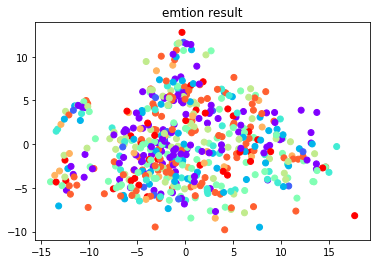

In [20]:
k = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,11:7,12:8}
colors = cm.rainbow(np.linspace(0, 1, 9))
emt_colors = [colors[k[i]] for i in emotion_label]
plt.title('emtion result')
plt.scatter(pcaout[..., 0], pcaout[..., 1], c=emt_colors)

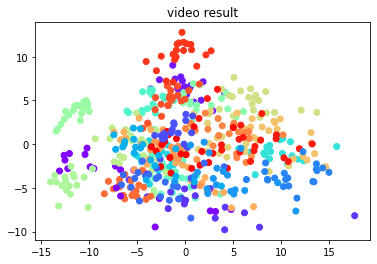

In [21]:
colors = cm.rainbow(np.linspace(0, 1, 30))
v_colors = [colors[int(i[0]) - 1] for i in subject_video_label]
plt.title('video result')
plt.scatter(pcaout[..., 0], pcaout[..., 1], c=v_colors)